In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Question from "data_science_assignment_banknotes.pdf"

### Question 1.1

In [7]:
banknote = pd.read_csv("data_banknote_authentication.csv")

In [8]:
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
banknote['color'] = np.where(banknote['class']==0, 'green', 'red')

In [13]:
banknote.head()

,variance,skewness,curtosis,entropy,class,color
0,3.62160,8.6661,-2.8073,-0.44699,0,green
1,4.54590,8.1674,-2.4586,-1.46210,0,green
2,3.86600,-2.6383,1.9242,0.10645,0,green
3,3.45660,9.5228,-4.0112,-3.59440,0,green
4,0.32924,-4.4552,4.5718,-0.98880,0,green


### Question 1.2

In [33]:
all_mean = np.round(banknote.mean(axis = 0), 2)
all_sd = np.round(banknote.std(axis = 0), 2)

In [34]:
banknote0 = np.round(banknote[banknote['class'] == 0], 2)
class0_mean = np.round(banknote0.mean(axis = 0), 2)
class0_sd = np.round(banknote0.std(axis = 0), 2)

In [35]:
banknote1 = np.round(banknote[banknote['class'] == 1], 2)
class1_mean = np.round(banknote1.mean(axis = 0), 2)
class1_sd = np.round(banknote1.std(axis = 0), 2)

In [40]:
banknote_table = {'mu_f1':[class0_mean[0], class1_mean[0], all_mean[0]], 
                  'sigma_f1':[class0_sd[0], class1_sd[0], all_sd[0]],
                  'mu_f2':[class0_mean[1], class1_mean[1], all_mean[1]], 
                  'sigma_f2':[class0_sd[1], class1_sd[1], all_sd[1]],
                  'mu_f3':[class0_mean[2], class1_mean[2], all_mean[2]], 
                  'sigma_f3':[class0_sd[2], class1_sd[2], all_sd[2]],
                  'mu_f4':[class0_mean[3], class1_mean[3], all_mean[3]],                   
                  'sigma_f4':[class0_sd[3], class1_sd[3], all_sd[3]]}

In [42]:
pd.DataFrame(banknote_table, index = ['0', '1', 'all'])

,mu_f1,sigma_f1,mu_f2,sigma_f2,mu_f3,sigma_f3,mu_f4,sigma_f4
0,2.28,2.02,4.26,5.14,0.80,3.24,-1.15,2.12
1,-1.87,1.88,-0.99,5.40,2.15,5.26,-1.25,2.07
all,0.43,2.84,1.92,5.87,1.40,4.31,-1.19,2.10


### Question 1.3

The signs of the mean of $f_1\text{ and }f_2$ are different between two class. 

The signs of the mean of $f_3\text{ and }f_4$ are the same. 

Relatively, the sigma of $f_3$ in class 1 is larger than class 0 by an amount that is much larger than other features. 

### Question 2.1

In [79]:
#X = banknote[['variance', 'skewness', 'curtosis', 'entropy']]
X = banknote
y = banknote[['class']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 2020)

##### good_bills.pdf

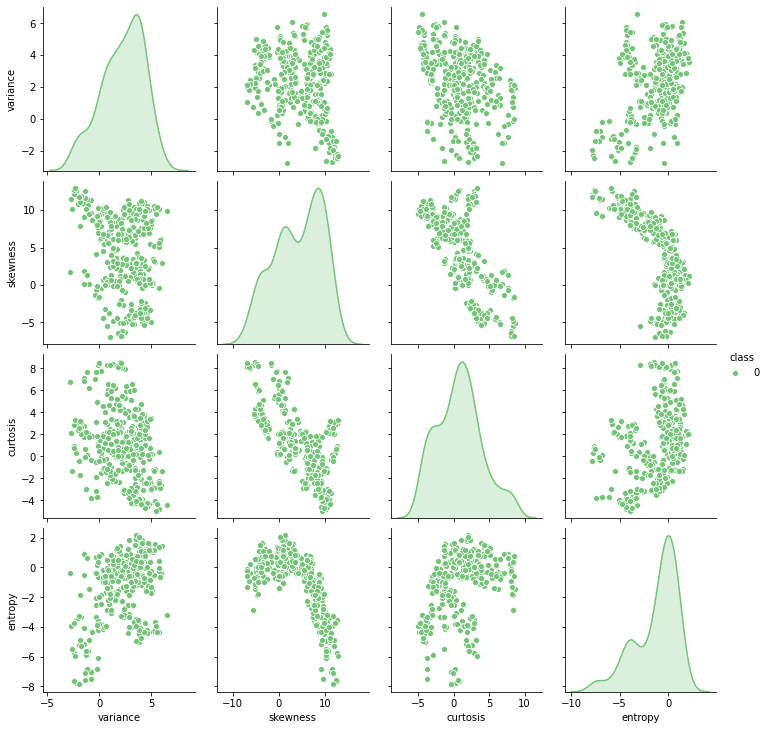

In [81]:
sns.pairplot(X_train[y_train['class'] == 0], hue = 'class', palette = "Greens")

#### fake_bills.pdf

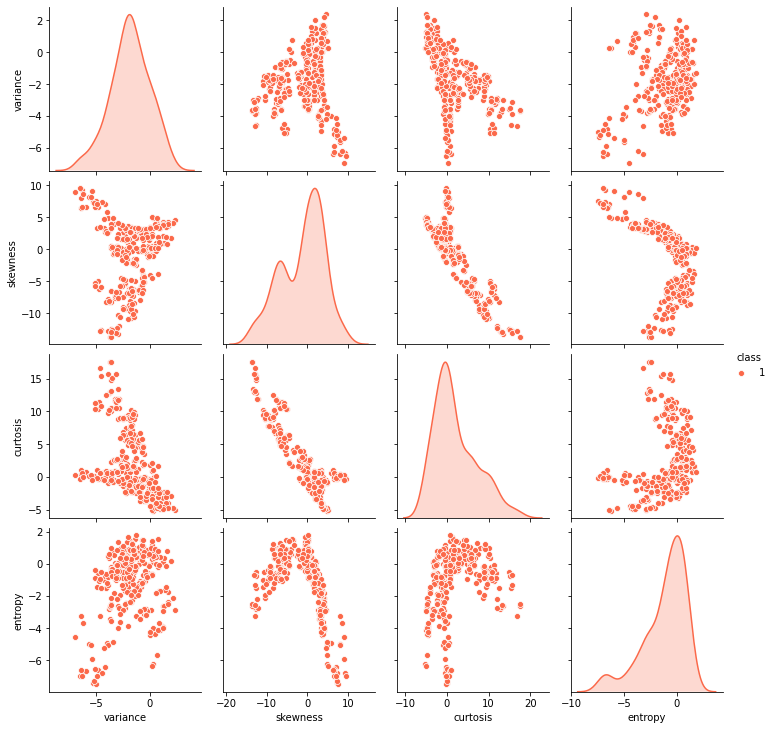

In [84]:
sns.pairplot(X_train[y_train['class'] == 1], hue = 'class', palette = "Reds")

### Question 2.2

For the feature variance f_1, we classify the observation to "good bill" if f_1 > 0, and "fake bill" otherwise. 

For the feature variance f_2, we classify the observation to "good bill" if f_2 > 6, and "fake bill" otherwise. 

For the feature variance f_3, we classify the observation to "good bill" if f_3 < 6, and "fake bill" otherwise. 

### Question 2.3

In [89]:
y_test_pred = X_test.apply(lambda x: np.where(x[0] > 0 and x[1] > 6 and x[2] < 6, 0, 1), axis = 1)

### Question 2.4.a

In [98]:
TP = np.sum(y_test[y_test_pred == 0] == 0)

### Question 2.4.b

In [99]:
FP = np.sum(y_test[y_test_pred == 0] == 1)

### Question 2.4.c

In [100]:
TN = np.sum(y_test[y_test_pred == 1] == 1)

### Question 2.4.d

In [101]:
FN = np.sum(y_test[y_test_pred == 1] == 0)

### Question 2.4.e

In [96]:
TPR = TP/(TP+FN)

### Question 2.4.f

In [97]:
TNR = TN/(TN+FP)

### Question 2.5

In [118]:
accuracy = np.mean(y_test['class'] == y_test_pred)
measure = pd.DataFrame({'TP':TP, 'FP':FP, 'TN':TN, 'FN':FN, 'accuracy':accuracy, 'TPR': TPR, 'TNR':TNR}).reset_index(drop = True)
measure

,TP,FP,TN,FN,accuracy,TPR,TNR
0,157,0,296,233,0.66035,0.402564,1.0


### Question 2.6

Yes, the accuracy is 66%, which is higher than 50%.

### Question 3.1

In [220]:
X = banknote[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 2021)

In [197]:
K = [3,5,7,9,11]
kNN_accuracy = []
for k in K:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    kNN_accuracy.append(np.mean(y_test == y_test_pred))

### Question 3.2

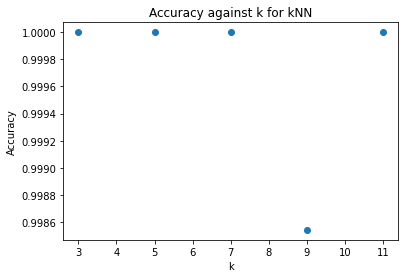

In [201]:
plt.scatter(K, kNN_accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy against k for kNN")
plt.show()

For k =3,5,7,11, we got the highest accuracy, which is 1. Since they all have the same accuracy and we prefer a simple model. So, I select k = 3. 

### Question 3.3

In [221]:
k_opt = 3
clf = KNeighborsClassifier(n_neighbors = k_opt)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

In [217]:
TP = np.sum(y_test[y_test_pred == 0] == 0)
FP = np.sum(y_test[y_test_pred == 0] == 1)
TN = np.sum(y_test[y_test_pred == 1] == 1)
FN = np.sum(y_test[y_test_pred == 1] == 0)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
accuracy = np.mean(y_test == y_test_pred)
measure2 = pd.DataFrame({'TP':[TP], 'FP':[FP], 'TN':[TN], 'FN':[FN],
                         'accuracy':[accuracy], 'TPR': [TPR], 'TNR':[TNR]})
measure2

,TP,FP,TN,FN,accuracy,TPR,TNR
0,379,0,307,0,1.0,1.0,1.0


### Question 3.4

In [272]:
# previous table
measure

,TP,FP,TN,FN,accuracy,TPR,TNR
0,157,0,296,233,0.66035,0.402564,1.0


In [273]:
# current table
measure2

,TP,FP,TN,FN,accuracy,TPR,TNR
0,379,0,307,0,1.0,1.0,1.0


Yes, we got 100% accuracy with k-NN classifier, which is higher than the accuracy 66% we obtained based on the simple classifier. 

The TP, TN, accuracy and TPR are higher when we compare to previous table. 

The FP remains the same, it is still 0. 

The FN drops to 0 from 233 compared to previous table. 

The TNR remains the same, it is still 1. 

### Question 3.5

In [218]:
f1 = 4
f2 = 8
f3 = 1
f4 = 2

Using simple rule, we have

In [219]:
np.where(f1 > 0 and f2 > 6 and f3 < 6, 0, 1)

array(0)

Based on simple rule, the class label I predicted is 0, good bill

Using k-NN with the best k=3, we have

In [223]:
clf.predict([[f1,f2,f3,f4]])

array([0])

Based on k-NN with the best k=3, the class label I predicted is 0, good bill

### Question 4.1

In [252]:
X = banknote[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 2022)

In [253]:
column_names = X.columns
k_opt = 3

X_train_full = X_train
X_test_full = X_test

accuracy_by_scenarious = []

for i in range(4):
    X_train = X_train_full
    X_test = X_test_full
    X_train = X_train.drop(columns = [column_names[i]])
    X_test =X_test.drop(columns = [column_names[i]])
    
    clf = KNeighborsClassifier(n_neighbors = k_opt)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_by_scenarious.append(np.mean(y_test_pred == y_test))

In [254]:
pd.DataFrame({'Scenarious':list(range(1,5)), 'accuracy':accuracy_by_scenarious})

,Scenarious,accuracy
0,1,0.963557
1,2,0.976676
2,3,0.978134
3,4,1.000000


### Question 4.2

The accuracy when all 4 features are used is 100%. Since we already in 100% when we use all 4 features, there is no way for any improvement by dropping any 1 feature. Instead, we notice that the accuracy did decrease when we drop f1, f2 or f3. The accuracy remain the same when we drop f4. 

### Question 4.3

When the feature variance, f1, is removed, it contributed the most to loss of accuracy compared to other three features. The accuracy when we remove f1 is 96.36%. It suggests that feature f1 is important for classify good of bad bills. 

### Question 4.4

When the feature entropy f4 is removed, it contributed the least to loss of accuracy. The accuracy is still remain at 100%. 

### Question 5.1

In [260]:
X = banknote[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 2023)

In [261]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

In [270]:
print("The accuracy for Xtest is %.2f%%." % (100*np.mean(y_test_pred == y_test)))

The accuracy for Xtest is 98.25%.


### Question 5.2

In [271]:
TP = np.sum(y_test[y_test_pred == 0] == 0)
FP = np.sum(y_test[y_test_pred == 0] == 1)
TN = np.sum(y_test[y_test_pred == 1] == 1)
FN = np.sum(y_test[y_test_pred == 1] == 0)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
accuracy = np.mean(y_test == y_test_pred)
measure3 = pd.DataFrame({'TP':[TP], 'FP':[FP], 'TN':[TN], 'FN':[FN],
                         'accuracy':[accuracy], 'TPR': [TPR], 'TNR':[TNR]})
measure3

,TP,FP,TN,FN,accuracy,TPR,TNR
0,371,1,303,11,0.982507,0.971204,0.996711


### Question 5.3

In [274]:
# table from simple classifier
measure

,TP,FP,TN,FN,accuracy,TPR,TNR
0,157,0,296,233,0.66035,0.402564,1.0


In [276]:
# table from kNN
measure2

,TP,FP,TN,FN,accuracy,TPR,TNR
0,379,0,307,0,1.0,1.0,1.0


In [277]:
# table from logistic Regression 
measure3

,TP,FP,TN,FN,accuracy,TPR,TNR
0,371,1,303,11,0.982507,0.971204,0.996711


Yes, the accuracy for the logistic regression is 98.25%, which is higher than the 66% accuracy from the simple classifier. 

TP, TN, accuracy and TPR are higher than the case when we use simple classifier but it is lower when we compared to kNN. 

FP is higher compare to both simple classifier or kNN. 

FN is lower compare to simple classifier, but it is higher than the case when we use kNN. 

TNR is lower when we compare to both simple classifier and kNN

### Question 5.4

No. The k-NN classifier with k=3 has accuracy 100%, which is better than the accuracy for the logistic regression. 

### Question 5.5

In [278]:
f1 = 4
f2 = 8
f3 = 1
f4 = 2

Using logistic regression model, we have

In [279]:
clf.predict([[f1,f2,f3,f4]])

array([0])

The class label predicted for this bill x by logistic regression is 0, good bill. It is the same label as predicted by k-NN

### Question 6.1

In [281]:
X = banknote[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 2023)

In [282]:
column_names = X.columns

X_train_full = X_train
X_test_full = X_test

accuracy_by_scenarious2 = []

for i in range(4):
    X_train = X_train_full
    X_test = X_test_full
    X_train = X_train.drop(columns = [column_names[i]])
    X_test =X_test.drop(columns = [column_names[i]])
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_by_scenarious2.append(np.mean(y_test_pred == y_test))

In [283]:
pd.DataFrame({'Scenarious':list(range(1,5)), 'accuracy':accuracy_by_scenarious2})

,Scenarious,accuracy
0,1,0.791545
1,2,0.903790
2,3,0.879009
3,4,0.982507


### Question 6.2

When we use all features, the accuracy is 98.25%. None of the 4 cases increases the accuracy compared with accuracy when all 4 features are used. 

### Questoin 6.3

The feature variance f1, when removed, contributed the most to loss of accuracy. 

### Question 6.4

The feature entropy f4, when removed, contributed the least to loss of accuracy. 

### Question 6.5

Yes, we obtain the same conclusion when we use k-NN. That means we conclude that f1 is important for classification and f4 is the least important for classification. 

## Question from "data_science_module_assignment_plot_portfolio_growth_knn.pdf"

In [286]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [291]:
XOM = pd.read_csv('XOM.csv')

XOM2 = XOM[XOM['Year'].isin([2019,2020])]

year = []
week = []
start_price = [list(XOM[XOM['Year'].isin([2018])]["Adj Close"])[-1]]
end_price = []
mu = []
sigma = []
label = []

week_sign = []
for i in [2019, 2020]:
    for j in range(53):
        subset = XOM2[(XOM2.Week_Number == j) & (XOM.Year == i)]
        n = subset.shape[0]
        sign = np.where(np.mean(subset.Return >= 0) >= 0.5, 'green', 'red')
        for k in range(n):
            week_sign.append(sign.tolist())
            
        year.append(i)
        week.append(j)
        start_price.append(list(subset["Adj Close"])[-1])
        end_price.append(list(subset["Adj Close"])[-1])
        mu.append(np.round(100*np.mean(subset.Return), 2))
        sigma.append(np.round(100*np.std(subset.Return), 2))
        label.append(sign)

start_price.pop() # delete the last adjusted close price        
XOM2['week_sign'] = week_sign            

In [292]:
mydata = pd.DataFrame({'year':year, 'week':week, 
                       'start_price':start_price, 'end_price':end_price,
                       'mu':mu, 'sigma':sigma, 'label':label})

##### Separate the data to train and test

In [299]:
data2019 = mydata[mydata.year == 2019]
data2020 = mydata[mydata.year == 2020].reset_index(drop = True)

X_train = data2019[['mu', 'sigma']]
y_train = np.where(data2019[['label']] == "green", 1, 0)
X_test = data2020[['mu', 'sigma']]
y_test = np.where(data2020[['label']] == "green", 1, 0)

##### Using buy-and-hold strategy

In [304]:
start_Price = data2020.end_price[0]
balances_buy_and_hold = []
for i in range(data2020.shape[0]):
    balances_buy_and_hold.append(100*(1+((data2020.end_price[i]-start_Price)/start_Price)))

##### Using true labels strategy

In [308]:
balances_true_labels = []
current_amount = 100
for i in range(data2020.shape[0]):
    if data2020['label'][i] == 'red':
        balances_true_labels.append(current_amount)
    else:
        current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.start_price[i]))
        balances_true_labels.append(current_amount)

##### Using kNN strategy

The optimal k we obtained from hw5 is 11. 

In [313]:
k_opt = 11
balances_kNN = []
p_candidates = [1,1.5,2]
for j in range(len(p_candidates)):
    temp_balances = []
    neigh = KNeighborsClassifier(n_neighbors = k_opt, p = p_candidates[j])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_train)
    knn_label = np.where(y_pred == 1, "green", "red")
    current_amount = 100
    for i in range(len(knn_label)):
        if knn_label[i] == 'green': 
            current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.start_price[i]))
            temp_balances.append(current_amount)
        else:
            temp_balances.append(current_amount)
    balances_kNN.append(temp_balances)

##### The five plots

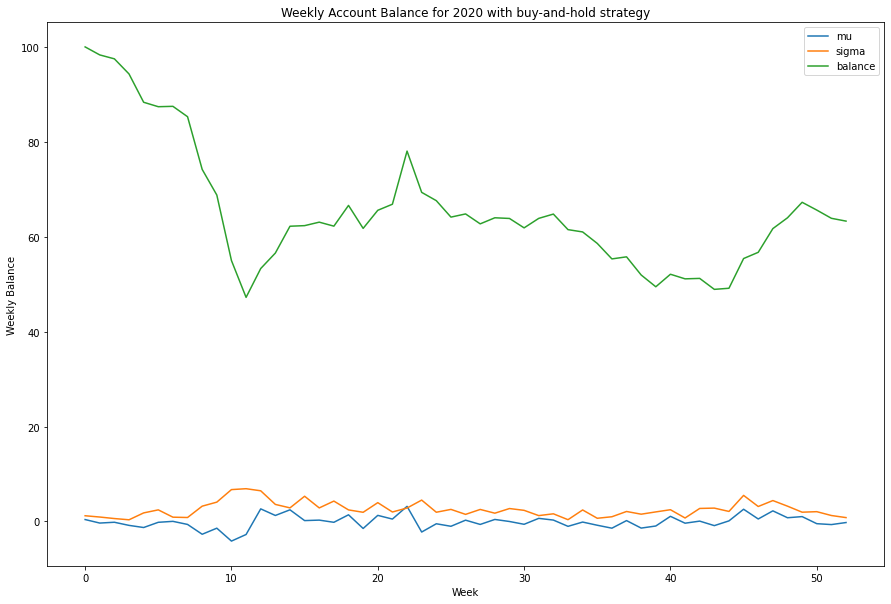

In [330]:
data2020_strategy1 = data2020[['mu', 'sigma']]
data2020_strategy1['balance'] = balances_buy_and_hold
data2020_strategy1.plot(title = 'Weekly Account Balance for 2020 with buy-and-hold strategy', 
                       figsize = (15,10),
                       xlabel = 'Week', 
                       ylabel = 'Weekly Balance')

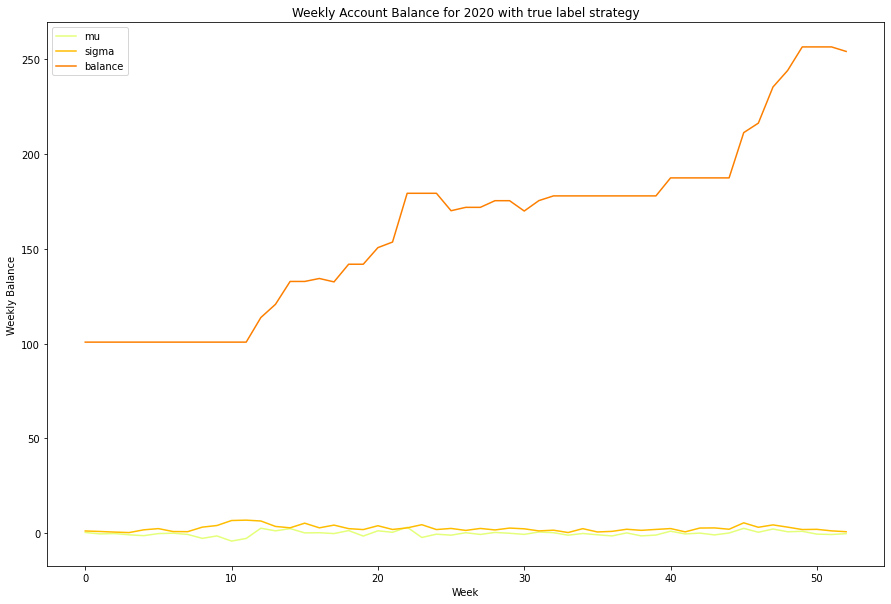

In [345]:
data2020_strategy2 = data2020[['mu', 'sigma']]
data2020_strategy2['balance'] = balances_true_labels
data2020_strategy2.plot(title = 'Weekly Account Balance for 2020 with true label strategy', 
                       figsize = (15,10),
                       xlabel = 'Week', 
                       ylabel = 'Weekly Balance',
                       colormap = 'Wistia')

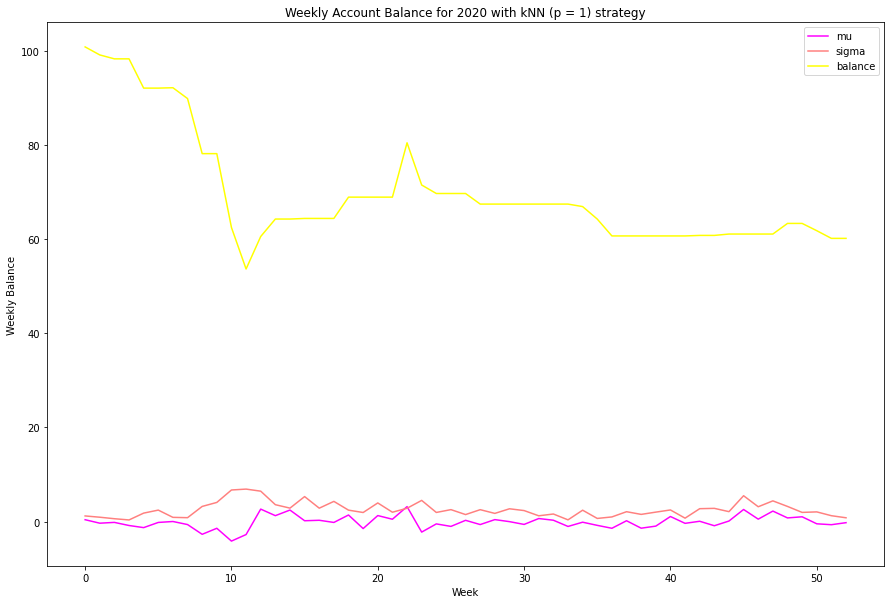

In [342]:
data2020_strategy3 = data2020[['mu', 'sigma']]
data2020_strategy3['balance'] = balances_kNN[0]
data2020_strategy3.plot(title = 'Weekly Account Balance for 2020 with kNN (p = 1) strategy', 
                       figsize = (15,10),
                       xlabel = 'Week', 
                       ylabel = 'Weekly Balance',
                       colormap = 'spring')

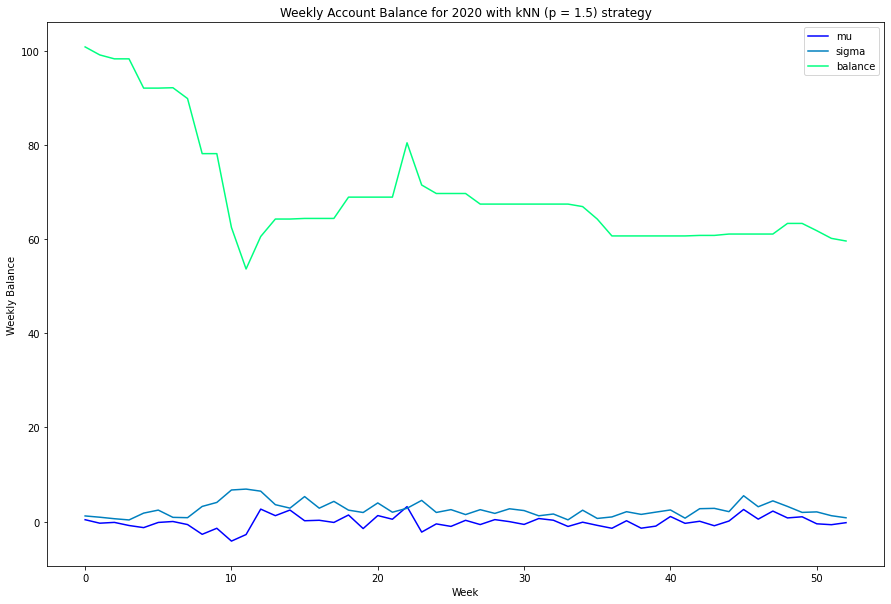

In [341]:
data2020_strategy4 = data2020[['mu', 'sigma']]
data2020_strategy4['balance'] = balances_kNN[1]
data2020_strategy4.plot(title = 'Weekly Account Balance for 2020 with kNN (p = 1.5) strategy', 
                       figsize = (15,10),
                       xlabel = 'Week', 
                       ylabel = 'Weekly Balance',
                       colormap = 'winter')

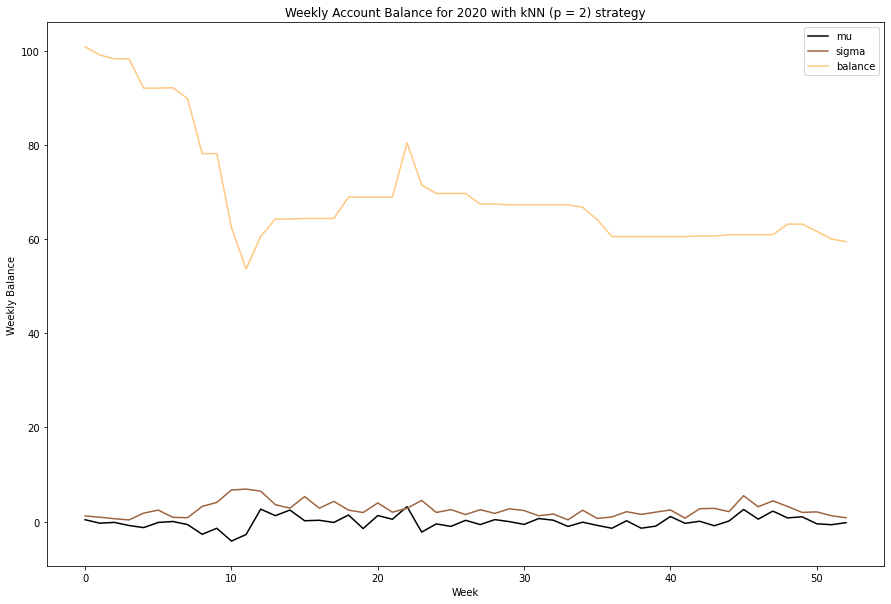

In [338]:
data2020_strategy5 = data2020[['mu', 'sigma']]
data2020_strategy5['balance'] = balances_kNN[2]
data2020_strategy5.plot(title = 'Weekly Account Balance for 2020 with kNN (p = 2) strategy', 
                       figsize = (15,10),
                       xlabel = 'Week', 
                       ylabel = 'Weekly Balance',
                       colormap = 'copper')

### Question from "data_science_module_assignment_stock_logistic_regression.pdf"

### Question 1.1

$$ P(y=+)=\frac{e^{\beta_0+\beta_1 X_{\mu}+\beta_2 X_{\sigma}}}{1+e^{\beta_0+\beta_1 X_{\mu}+\beta_2 X_{\sigma}}}$$

### Question 1.2

In [349]:
data2019 = mydata[mydata.year == 2019]
data2020 = mydata[mydata.year == 2020].reset_index(drop = True)

X_train = data2019[['mu', 'sigma']]
y_train = np.where(data2019[['label']] == "green", 1, 0)
X_test = data2020[['mu', 'sigma']]
y_test = np.where(data2020[['label']] == "green", 1, 0)

In [350]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [353]:
print("The accuracy for year 2 is %.2f%%" % (100*np.mean(y_pred == y_test)))

The accuracy for year 2 is 49.38%


### Question 1.3

In [355]:
confusion_matrix(y_test, y_pred)

array([[ 9, 21],
       [15,  8]])

In [369]:
pd.DataFrame({'Pred_Negative':[9,15], 'Pred_Positive':[21,8]}, 
            index = ['True_Negative', 'True_Positive'])

,Pred_Negative,Pred_Positive
True_Negative,9,21
True_Positive,15,8


### Question 1.4

In [371]:
TP = np.sum(y_test[y_pred == 0] == 0)
FP = np.sum(y_test[y_pred == 0] == 1)
TN = np.sum(y_test[y_pred == 1] == 1)
FN = np.sum(y_test[y_pred == 1] == 0)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)

In [372]:
print("True positive rate is %.2f%%." % (100*TPR))

True positive rate is 30.00%.


In [375]:
print("True negative rate is %.2f%%." % (100*TNR))

True negative rate is 34.78%.


### Question 1.5

Using buy-and-hold strategy

In [376]:
end_Price = data2020.end_price[data2020.shape[0]-1]
start_Price = data2020.end_price[0]
buy_and_hold_amount = 100*(1+((end_Price-start_Price)/start_Price))

Using the predicted label by logistic regression

In [399]:
balance_logistic = []
current_amount = 100
for i in range(len(y_test)):
    if y_test[i] == 1: 
        current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.end_price[i]))
        balance_logistic.append(current_amount)
    else:
        balance_logistic.append(current_amount)    

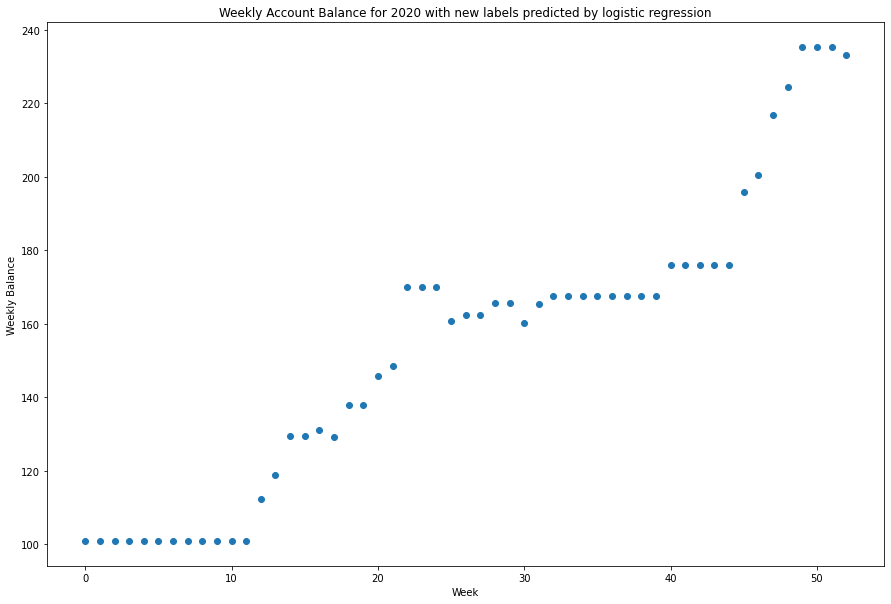

In [400]:
plt.figure(figsize = (15,10))
plt.scatter(data2020['week'], balance_logistic)
plt.xlabel("Week")
plt.ylabel("Weekly Balance")
plt.title("Weekly Account Balance for 2020 with new labels predicted by logistic regression")
plt.show()

In [403]:
print("The balance at the end of the year by logistic regression stratgegy is $%d" % balance_logistic[-1])

The balance at the end of the year by logistic regression stratgegy is $233


In [405]:
print("The balance at the end of the year by buy-and-hold stratgegy is $%d" % buy_and_hold_amount)

The balance at the end of the year by buy-and-hold stratgegy is $63


The logistic regression approach results in a larger amount at the end of the year. 